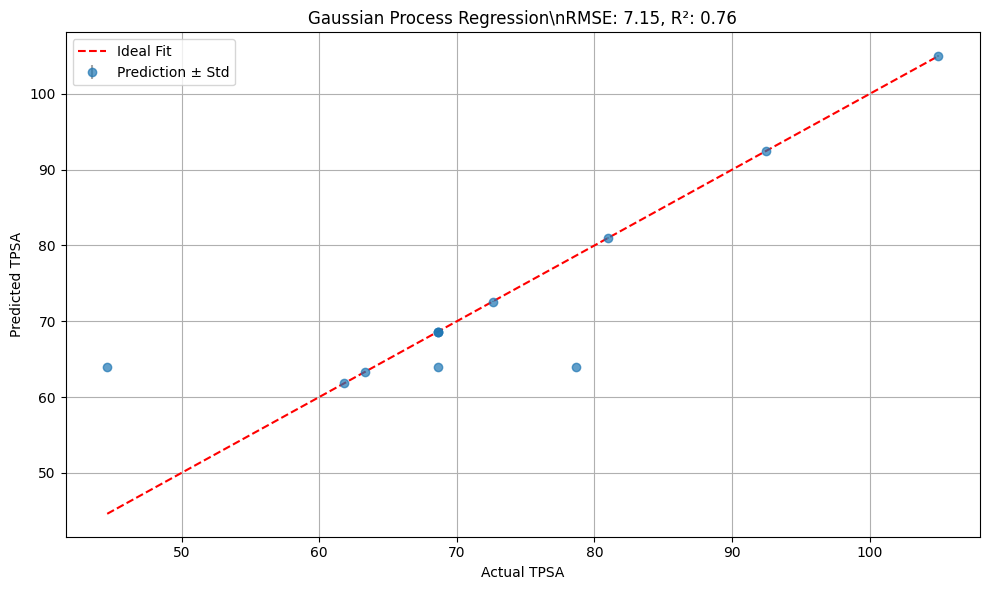

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = 'topological_indices_dataset.csv'  # Replace with correct path in Colab
df = pd.read_csv(url)

# Keep only numerical columns and drop non-numeric (like Drug, Disease)
df_numeric = df.select_dtypes(include=['number'])

# Separate features and target
target_col = 'TPSA'
X_features = df_numeric.drop(columns=[target_col])
y = df_numeric[target_col].values

# PCA Transformation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_features)

# Gaussian Process Regression
kernel = C(1.0) * RBF(length_scale=1.0)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
gpr.fit(X_pca, y)

# Predict with uncertainty
y_pred, y_std = gpr.predict(X_pca, return_std=True)

# Evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Plot
plt.figure(figsize=(10, 6))
plt.errorbar(y, y_pred, yerr=y_std, fmt='o', ecolor='gray', alpha=0.7, label='Prediction ± Std')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Ideal Fit')
plt.xlabel('Actual TPSA')
plt.ylabel('Predicted TPSA')
plt.title(f'Gaussian Process Regression\\nRMSE: {rmse:.2f}, R²: {r2:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


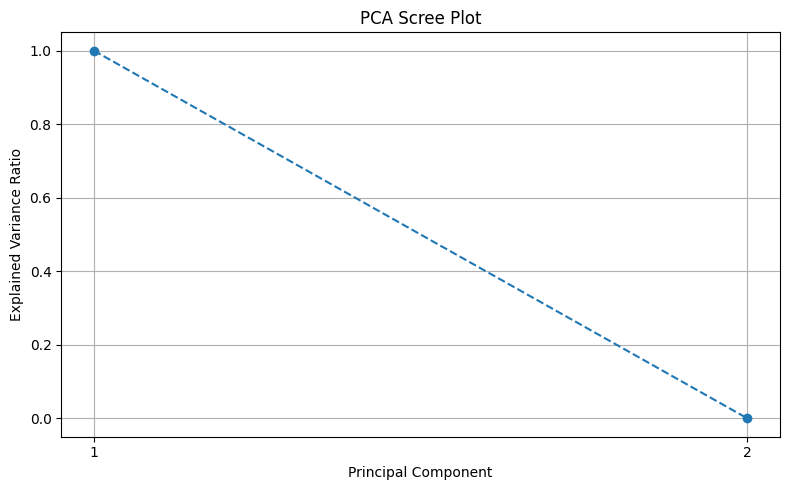

In [ ]:
# Generate PCA scree plot (explained variance per component)
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('PCA Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_)+1))
plt.tight_layout()

# Save as PNG
scree_plot_path = "pca_scree_plot.png"
plt.savefig(scree_plot_path, dpi=300)
plt.show()


NameError: name 'pca_df' is not defined

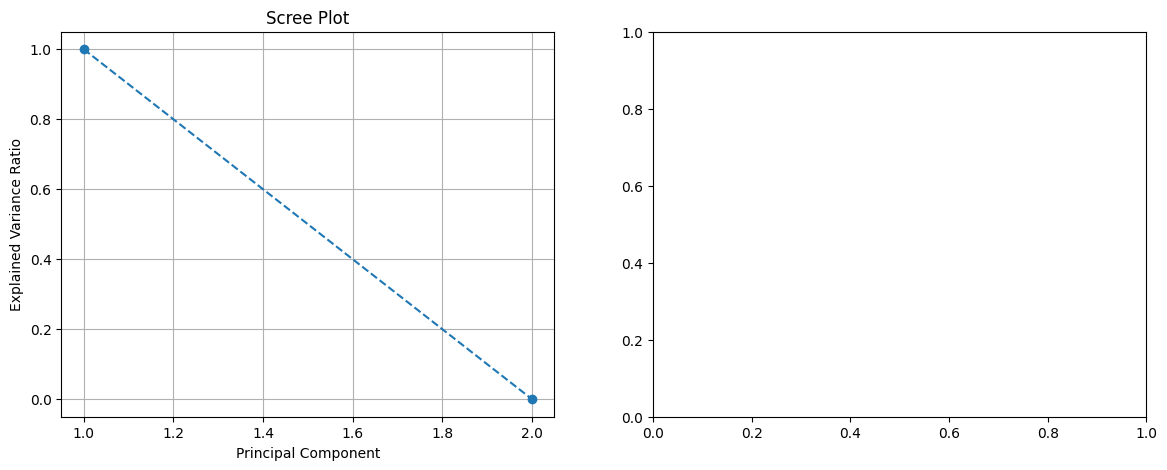

In [ ]:
# Create combined PCA plot: scree plot + PC1 vs PC2 colored by TPSA
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Scree plot
axs[0].plot(np.arange(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
axs[0].set_title('Scree Plot')
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Explained Variance Ratio')
axs[0].grid(True)

# PC1 vs PC2 colored by TPSA
sc = axs[1].scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['TPSA'], cmap='viridis')
axs[1].set_title('PC1 vs PC2 colored by TPSA')
axs[1].set_xlabel('PC1')
axs[1].set_ylabel('PC2')
axs[1].grid(True)
fig.colorbar(sc, ax=axs[1], label='TPSA')

plt.tight_layout()
combined_pca_plot_path = "data/pca_combined_plot.png"
plt.savefig(combined_pca_plot_path, dpi=300)
plt.show()


In [ ]:
!pip install gplearn

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    10.22          74.7973       18          31.2675           36.044     24.57s
   1    11.22          69.0591       19          24.3719           30.983     59.47s
   2    13.35          63.5807       22          10.1692          25.3518     47.18s
   3    18.73           44.171       19          9.37558           18.168     15.80s
   4    21.71           43.557       25          7.02819          29.9049     14.07s
   5    22.09          43.9292       31          7.23735          9.67856     13.42s
   6    22.56          44.5129       31          5.78293          16.9506     11.80s
   7    23.11          38.4175       31          5.78293          16.9506     10.68s
   8    26.26          39.8297       31          5.78293          16.9506  

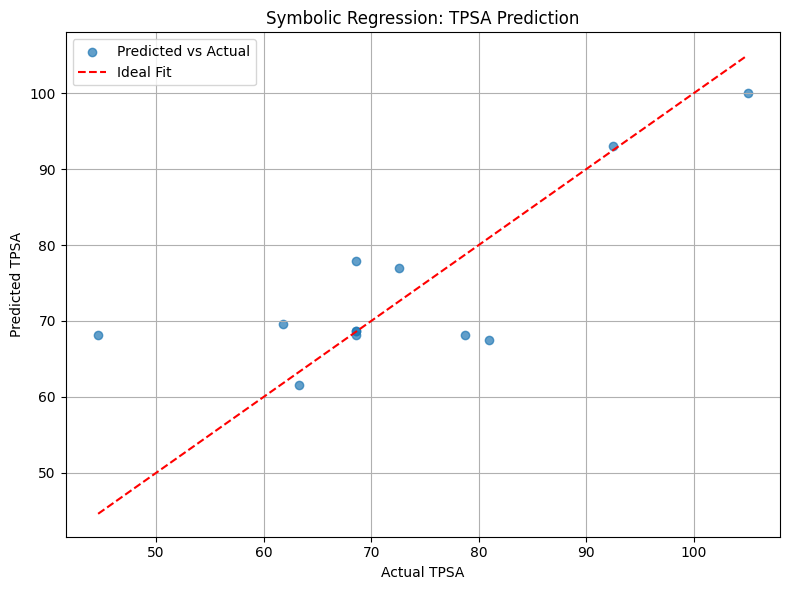

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from gplearn.genetic import SymbolicRegressor

# Step 1: Load dataset
df = pd.read_csv("topological_indices_dataset.csv")  # Replace with your actual filename

# Step 2: Keep only numeric columns
df_numeric = df.select_dtypes(include='number')

# Step 3: Separate features and target
X_raw = df_numeric.drop(columns=['TPSA'])
y = df_numeric['TPSA'].values

# Step 4: PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_raw)

# Step 5: Standardize PCA-transformed features
scaler = StandardScaler()
X = scaler.fit_transform(X_pca)

# Step 6: Define symbolic regressor
symbolic_model = SymbolicRegressor(
    population_size=1000,
    generations=20,
    tournament_size=20,
    stopping_criteria=0.01,
    const_range=(-5.0, 5.0),
    init_depth=(2, 4),
    init_method='half and half',
    function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log'),
    p_crossover=0.7,
    p_subtree_mutation=0.1,
    p_hoist_mutation=0.05,
    p_point_mutation=0.1,
    max_samples=0.9,
    verbose=1,
    parsimony_coefficient=0.01,
    random_state=42
)

# Step 7: Fit the model
symbolic_model.fit(X, y)

# Step 8: Make predictions
y_pred = symbolic_model.predict(X)

# Step 9: Evaluate model
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print("\nDiscovered Expression:")
print(symbolic_model._program)
print(f"\nRMSE: {rmse:.2f}")
print(f"R^2: {r2:.2f}")

# Step 10: Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Ideal Fit')
plt.xlabel('Actual TPSA')
plt.ylabel('Predicted TPSA')
plt.title('Symbolic Regression: TPSA Prediction')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:

# Save the figure
plt.savefig("symbolic_regression_tpsa.png", dpi=300)  # Saves to current working directory
plt.show()

<Figure size 640x480 with 0 Axes>

In [ ]:

!pip install torchdiffeq

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from torchdiffeq import odeint

# Load the dataset
from google.colab import files
uploaded = files.upload()

import io
df = pd.read_csv(io.BytesIO(uploaded['topological_indices_dataset.csv']))
df_numeric = df.select_dtypes(include='number')

X_raw = df_numeric.drop(columns=['TPSA'])
y = df_numeric['TPSA'].values

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_raw)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# Create synthetic time dimension
t = torch.linspace(0, 1, steps=len(X_tensor))  # simulate time evolution

# TPSA as time-dependent observable
y_tensor = torch.tensor(y, dtype=torch.float32)

# Define the Neural ODE function
class ODEFunc(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )

    def forward(self, t, x):
        return self.net(x)

# Wrap in an ODEBlock
class NeuralODE(nn.Module):
    def __init__(self, ode_func):
        super().__init__()
        self.ode_func = ode_func

    def forward(self, x, t):
        out = odeint(self.ode_func, x, t)
        return out[-1]  # return the last time point

# Initialize model
ode_func = ODEFunc()
model = NeuralODE(ode_func)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

# Training
epochs = 300
for epoch in range(epochs):
    optimizer.zero_grad()
    y_pred = model(X_tensor, t)
    loss = criterion(y_pred.squeeze(), y_tensor)
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluate
with torch.no_grad():
    y_pred_final = model(X_tensor, t).squeeze().numpy()
    rmse = np.sqrt(mean_squared_error(y, y_pred_final))
    r2 = r2_score(y, y_pred_final)

print(f"\\nFinal RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred_final, alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Ideal Fit')
plt.xlabel('Actual TPSA')
plt.ylabel('Predicted TPSA')
plt.title('Neural ODE: TPSA Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("neural_ode_tpsa.png", dpi=300)
plt.show()


Saving topological_indices_dataset.csv to topological_indices_dataset (1).csv


KeyError: 'topological_indices_dataset.csv'

In [ ]:
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))


In [ ]:
# Load the uploaded raw dataset and normalize it before using in Neural ODE
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load original dataset
df_raw = pd.read_csv("topological_indices_dataset.csv")

# Keep only numeric columns
df_numeric = df_raw.select_dtypes(include='number')

# Normalize using Min-Max scaling
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)

# Save normalized dataset for use in neural network modeling
normalized_path = "normalized_topological_indices_dataset.csv"
df_normalized.to_csv(normalized_path, index=False)

normalized_path


'normalized_topological_indices_dataset.csv'

In [ ]:
class NeuralODE(nn.Module):
    def __init__(self, ode_func):
        super().__init__()
        self.ode_func = ode_func

    def forward(self, x_batch, t):
        outputs = []
        for x in x_batch:
            x0 = x.unsqueeze(0)  # shape [1, 2]
            out = odeint(self.ode_func, x0, t)[-1]
            outputs.append(out.squeeze(0))
        return torch.stack(outputs)



In [ ]:
# STEP 1: pip install torchdiffeq first if needed
# pip install torchdiffeq

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from torchdiffeq import odeint



In [ ]:
# STEP 2: Load and normalize dataset
df = pd.read_csv("normalized_topological_indices_dataset.csv")
X_raw = df.drop(columns=["TPSA"])
y = df["TPSA"].values


In [ ]:

# STEP 3: PCA and scaling
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_raw)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Convert to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)
t = torch.tensor([0.0, 1.0])  # time steps


In [ ]:

# STEP 4: Define Neural ODE function
class ODEFunc(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 32),
            nn.Tanh(),
            nn.Linear(32, 1)
        )
    def forward(self, t, x):
        return self.net(x)



In [ ]:
# STEP 5: Predict TPSA using Neural ODEs (individually)
func = ODEFunc()
optimizer = optim.Adam(func.parameters(), lr=1e-3)
criterion = nn.MSELoss()

epochs = 300
for epoch in range(epochs):
    total_loss = 0
    for i in range(len(X_tensor)):
        x0 = X_tensor[i]  # shape [2]
        true_y = y_tensor[i]
        pred_y = odeint(func, x0, t)[-1]
        loss = criterion(pred_y, true_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")


RuntimeError: shape '[2]' is invalid for input of size 1

In [ ]:

# STEP 6: Final prediction loop
y_pred_final = []
with torch.no_grad():
    for i in range(len(X_tensor)):
        x0 = X_tensor[i].unsqueeze(0)
        pred = odeint(func, x0, t)[-1]
        y_pred_final.append(pred.item())

# STEP 7: Evaluation
y_pred_final = np.array(y_pred_final)
rmse = np.sqrt(mean_squared_error(y, y_pred_final))
r2 = r2_score(y, y_pred_final)

print(f"\nFinal RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# STEP 8: Plot
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred_final, alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Ideal Fit')
plt.xlabel('Actual TPSA')
plt.ylabel('Predicted TPSA')
plt.title('Neural ODE: TPSA Prediction (Individual Integration)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("neural_ode_tpsa_fixed.png", dpi=300)
plt.show()


In [ ]:
y_pred_final = []
with torch.no_grad():
    for i in range(len(X_tensor)):
        x0 = X_tensor[i]
        z_final = odeint(func, x0, t)[-1]
        pred = decoder(z_final).squeeze()
        y_pred_final.append(pred.item())

y_pred_final = np.array(y_pred_final)
rmse = np.sqrt(mean_squared_error(y, y_pred_final))
r2 = r2_score(y, y_pred_final)

print(f"Final RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


RuntimeError: shape '[2]' is invalid for input of size 1

Epoch 0, Loss: 11.3759
Epoch 50, Loss: 0.9593
Epoch 100, Loss: 0.6681
Epoch 150, Loss: 0.6083
Epoch 200, Loss: 0.5705
Epoch 250, Loss: 0.5395

Final RMSE: 0.21
R² Score: 0.28


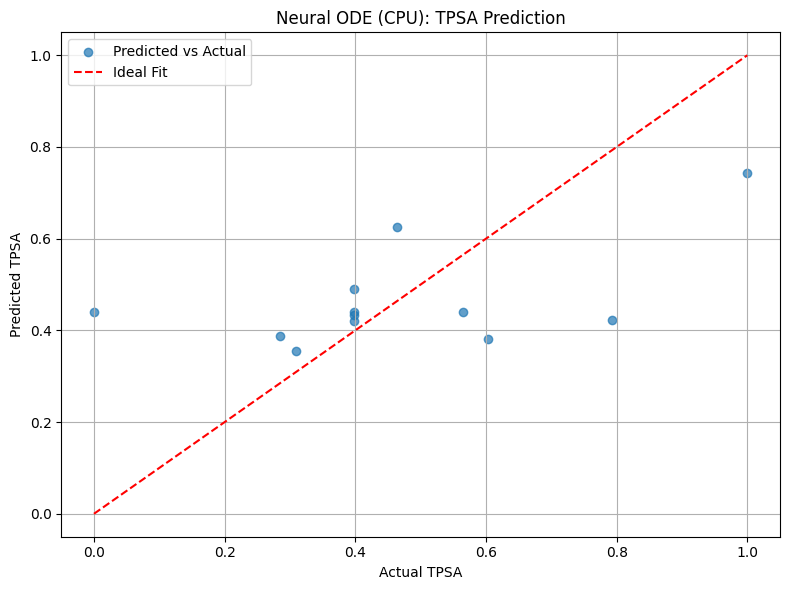

In [ ]:
# pip install torchdiffeq if needed
# pip install torch torchdiffeq

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from torchdiffeq import odeint

# Force CPU
device = torch.device("cpu")

# Load normalized dataset
df = pd.read_csv("normalized_topological_indices_dataset.csv")
X_raw = df.drop(columns=["TPSA"])
y = df["TPSA"].values

# PCA transformation and standardization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_raw)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Convert to tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).to(device)
t = torch.tensor([0.0, 1.0], dtype=torch.float32).to(device)

# Define ODE function: returns same shape as input
class ODEFunc(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 32),
            nn.Tanh(),
            nn.Linear(32, 2)
        )
    def forward(self, t, x):
        return self.net(x)

# Decoder layer
decoder = nn.Sequential(nn.Linear(2, 1)).to(device)

# Training
func = ODEFunc().to(device)
params = list(func.parameters()) + list(decoder.parameters())
optimizer = optim.Adam(params, lr=1e-3)
criterion = nn.MSELoss()

epochs = 300
for epoch in range(epochs):
    total_loss = 0
    for i in range(len(X_tensor)):
        x0 = X_tensor[i].unsqueeze(0)  # shape [1, 2]
        true_y = y_tensor[i]

        z_final = odeint(func, x0, t)[-1]
        pred_y = decoder(z_final).squeeze()

        loss = criterion(pred_y, true_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

# Predict
y_pred_final = []
with torch.no_grad():
    for i in range(len(X_tensor)):
        x0 = X_tensor[i].unsqueeze(0)
        z_final = odeint(func, x0, t)[-1]
        pred = decoder(z_final).squeeze()
        y_pred_final.append(pred.item())

# Evaluate
y_pred_final = np.array(y_pred_final)
rmse = np.sqrt(mean_squared_error(y, y_pred_final))
r2 = r2_score(y, y_pred_final)

print(f"\nFinal RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred_final, alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Ideal Fit')
plt.xlabel('Actual TPSA')
plt.ylabel('Predicted TPSA')
plt.title('Neural ODE (CPU): TPSA Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("neural_ode_tpsa_cpu_fixed.png", dpi=300)
plt.show()


In [ ]:
!pip install torch==2.0.0+cpu torchvision==0.15.0+cpu -f https://download.pytorch.org/whl/torch_stable.html
!pip install torchdiffeq
!pip install matplotlib pandas scikit-learn


Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0+cu124
    Uninstalling torch-2.6.0+cu124:
      Successfully uninstalled torch-2.6.0+cu124
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.21.0+cu124
    Uninstalling torchvision-0.21.0+cu124:
      Successfully uninstalled torchvision-0.21.0+cu124
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.0.0+cpu which is incompatible.


ERROR: Operation cancelled by user
^C
^C


In [ ]:
# Final, improved Neural ODE model using all topological indices (no PCA), deeper architecture, and strictly CPU execution

import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from torchdiffeq import odeint

# Enforce CPU
device = torch.device("cpu")

# Load dataset
df = pd.read_csv("normalized_topological_indices_dataset.csv")
X_raw = df.drop(columns=["TPSA"])
y = df["TPSA"].values

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)

# Tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
y_tensor = torch.tensor(y, dtype=torch.float32).to(device)
t = torch.linspace(0., 1., steps=5).to(device)

input_dim = X_tensor.shape[1]

# Deeper ODE function
class ODEFunc(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, 64),
            nn.Tanh(),
            nn.Linear(64, 32),
            nn.Tanh(),
            nn.Linear(32, dim)
        )
    def forward(self, t, x):
        return self.net(x)

# Decoder from latent to TPSA
decoder = nn.Sequential(nn.Linear(input_dim, 1)).to(device)

# Model setup
func = ODEFunc(input_dim).to(device)
params = list(func.parameters()) + list(decoder.parameters())
optimizer = optim.Adam(params, lr=1e-3, weight_decay=1e-4)
criterion = nn.MSELoss()

# Training
epochs = 300
for epoch in range(epochs):
    total_loss = 0
    for i in range(len(X_tensor)):
        x0 = X_tensor[i].unsqueeze(0)  # shape [1, input_dim]
        true_y = y_tensor[i]

        z_final = odeint(func, x0, t)[-1]  # shape [1, input_dim]
        pred_y = decoder(z_final).squeeze()

        loss = criterion(pred_y, true_y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {total_loss:.4f}")

# Prediction
y_pred_final = []
with torch.no_grad():
    for i in range(len(X_tensor)):
        x0 = X_tensor[i].unsqueeze(0)
        z_final = odeint(func, x0, t)[-1]
        pred = decoder(z_final).squeeze()
        y_pred_final.append(pred.item())

# Evaluation
y_pred_final = np.array(y_pred_final)
rmse = np.sqrt(mean_squared_error(y, y_pred_final))
r2 = r2_score(y, y_pred_final)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred_final, alpha=0.7, label='Predicted vs Actual')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', label='Ideal Fit')
plt.xlabel('Actual TPSA')
plt.ylabel('Predicted TPSA')
plt.title('Neural ODE (Improved, CPU Only): TPSA Prediction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plot_path = "neural_ode_tpsa_final_cpu_safe.png"
plt.savefig(plot_path, dpi=300)
plt.close()

rmse, r2, plot_path



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

Epoch 0, Loss: 25.9443
Epoch 50, Loss: 0.7702
Epoch 100, Loss: 0.4731
Epoch 150, Loss: 0.3479
Epoch 200, Loss: 0.3126
Epoch 250, Loss: 0.2964


(np.float64(0.13966652201281615),
 0.672064557553631,
 'neural_ode_tpsa_final_cpu_safe.png')